In [1]:
import pandas as pd

In [2]:
import sys
sys.path
# sys.path.append('..')


['E:\\argoverse-api-ccuse\\chenchencode',
 'E:\\argoverse-api-ccuse',
 'E:\\LasVSim\\sumo-win64-1.6.0\\sumo-1.6.0\\tools',
 'D:\\ProgramData\\Anaconda3\\python37.zip',
 'D:\\ProgramData\\Anaconda3\\DLLs',
 'D:\\ProgramData\\Anaconda3\\lib',
 'D:\\ProgramData\\Anaconda3',
 '',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.7.egg',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Johnc\\.ipython']

In [5]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from chenchencode.arg_customized import data_loader_customized
# 设置路径
root_dir = '../forecasting_sample/data/'
afl = ArgoverseForecastingLoader(root_dir)  # loader对象
print('Total number of sequences:',len(afl))  # 文件夹中的seq，即数据文件的数量

Total number of sequences: 28


In [5]:
afl[14]  # 指定文件夹中第几个文件
afl[14].seq_list  # 文件夹中文件的路径
afl[14].track_id_list  # 所指定文件中的track名，即车辆对象ID
afl[14].seq_df  # 将指定文件中的数据变为df格式
afl[14].agent_traj  # 指定文件中的自车agent的路径

array([[ 816.02199341, 2112.9816757 ],
       [ 815.93342574, 2113.04385959],
       [ 816.71339562, 2113.01357686],
       [ 816.92520535, 2113.03088988],
       [ 817.49051545, 2112.95810889],
       [ 817.76760538, 2113.08218993],
       [ 818.06815494, 2113.05096926],
       [ 818.16579581, 2113.14665628],
       [ 818.69483485, 2113.12052732],
       [ 819.24620433, 2113.15299699],
       [ 819.42709438, 2113.23796971],
       [ 820.12911863, 2113.18561713],
       [ 820.41280386, 2113.28232344],
       [ 821.04346964, 2113.21740298],
       [ 821.27942644, 2113.29559052],
       [ 821.86681379, 2113.27981464],
       [ 822.02893568, 2113.33664199],
       [ 822.26363066, 2113.40929523],
       [ 822.74444268, 2113.36345844],
       [ 822.92370711, 2113.38295531],
       [ 823.32339318, 2113.42972206],
       [ 823.57933081, 2113.31021546],
       [ 823.80163753, 2113.37137207],
       [ 824.09534051, 2113.29527583],
       [ 828.44200142, 2113.58196323],
       [ 828.65994056, 21

In [6]:
afl[5].current_seq
afl[5].get_all_traj_for_train()

AttributeError: 'ArgoverseForecastingLoader' object has no attribute 'get_all_traj_for_train'

#### 但是给出的方法中没有涉及除了agent以外其他车辆的路径输出方法
我自己编写了相关方法，为：data_loader_customed(file_path).get_ov_traj(track_id)

In [7]:
afl[0].track_id_list
afl[0].get_ov_traj('00000000-0000-0000-0000-000000023211')

AttributeError: 'ArgoverseForecastingLoader' object has no attribute 'get_ov_traj'

In [7]:
from argoverse.visualization.visualize_sequences import viz_sequence

#### 可视化

../forecasting_sample/data//15.csv


E:\argoverse-api-ccuse\argoverse\map_representation\map_api.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lane_polygons = np.array(self.get_vector_map_lane_polygons(city_name))
E:\argoverse-api-ccuse\argoverse\map_representation\map_api.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  driveable_areas = np.array(self.get_vector_map_driveable_areas(city_name))


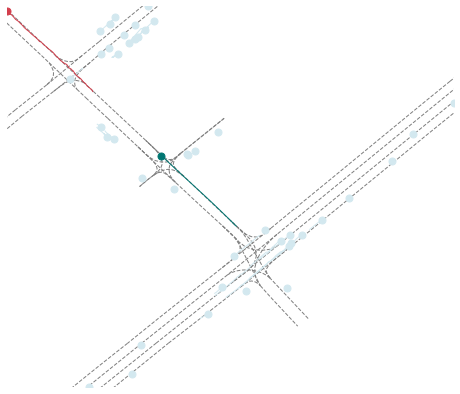

In [11]:
seq_path = f"{root_dir}/15.csv"
print(seq_path)
viz_sequence(afl.get(seq_path).seq_df, show=True)

#### 使用map api可视化

In [1]:
from argoverse.map_representation.map_api import ArgoverseMap
avm = ArgoverseMap()

E:\argoverse-api-ccuse\argoverse\map_representation\map_api.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lane_polygons = np.array(self.get_vector_map_lane_polygons(city_name))
E:\argoverse-api-ccuse\argoverse\map_representation\map_api.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  driveable_areas = np.array(self.get_vector_map_driveable_areas(city_name))


In [2]:
obs_len = 50
index = 1
seq_path = afl[0].seq_list[index]
print(seq_path)

NameError: name 'afl' is not defined

In [3]:
# agent_obs_traj = afl.get(seq_path).get_ov_traj(afl.track_id_list[0])[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

NameError: name 'agent_obs_traj' is not defined

In [49]:
agent_obs_traj

array([[2169.59689458,  821.24877358],
       [2169.55451848,  821.20797658],
       [2169.55444572,  821.20783128],
       [2169.55455094,  821.20774331],
       [2169.55413117,  821.20801155],
       [2169.5542022 ,  821.20806816],
       [2169.55422939,  821.2079166 ],
       [2169.55443765,  821.20796838],
       [2169.55440218,  821.20819519],
       [2169.55432827,  821.20821704],
       [2169.55432412,  821.20828268],
       [2169.55424398,  821.20828768],
       [2169.55423628,  821.20854122],
       [2169.55395146,  821.20860453],
       [2169.55390242,  821.20854893],
       [2169.5538425 ,  821.20850187],
       [2169.55315643,  821.20753037],
       [2169.54888971,  821.20322144],
       [2169.54187144,  821.1959895 ],
       [2169.52071518,  821.17207132],
       [2169.48460221,  821.13617899],
       [2169.43800301,  821.08921728],
       [2169.36415869,  821.01461614],
       [2169.28864819,  820.93737753],
       [2169.19607173,  820.8410511 ],
       [2169.09809587,  8